#**Developer Engagement on Stack Overflow: An Analysis**


##Overview

This project focuses on examining Stack Overflow data from 2017 to explore various facets:

**1. Evaluation of Developer Involvement:** Understanding the extent of developer engagement on Stack Overflow.

**2. Correlation Between Developer Salaries and Platform Engagement:** Investigating potential links between a developer's income and their activity level on the platform.

**3. Impact of User Account Status on Behavior:** Analyzing how a user's account status affects their behavior and utilization of the platform.


## Exploring the Dataset

To gain deeper insights into the dataset, let's examine several of its attributes. Initially, we'll begin by importing the essential libraries and reading in the dataset.

In [ ]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For basic data visualization
import seaborn as sns  # For advanced data visualization

Uploading Data:

In [ ]:
df1 = pd.read_csv('survey_results_public.csv')
df1.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,46899.000000,38920.000000,36836.000000,18508.000000,32727.000000,11464.000000,2244.000000
mean,23450.000000,7.304882,6.963758,3.923114,8.419806,56359.149737,33525.589384
std,13538.719474,1.947843,2.160046,7.565523,1.385215,39898.041285,30309.346103
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11725.500000,6.000000,6.000000,0.000000,8.000000,26881.720430,4651.248601
50%,23450.000000,8.000000,7.000000,1.000000,9.000000,50000.000000,30000.000000
75%,35174.500000,9.000000,8.000000,4.000000,9.000000,80000.000000,52499.594367
max,46899.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [ ]:
df2 = pd.read_csv('survey_results_schema.csv')
df2.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


## Question1: How can we assess the level of developer engagement on Stack Overflow?

### 1. Data Gathering
##### 1.1. Find the related columns

In [ ]:
def find_columns_of_interest(df, target_string):
    related_columns = []
    for col in df.columns:
        if target_string in col:
            related_columns.append(col)
    return related_columns

# Find columns containing 'StackOverflow' in their names
columns_contain_StackOverflow = find_columns_of_interest(df2, 'StackOverflow')


##### 1.2 Choosing Relevant Fields


In [ ]:
# List of columns related to Stack Overflow activity
columns_stack_overflow = ['StackOverflowDescribes', 'StackOverflowFoundAnswer',
                          'StackOverflowCopiedCode', 'StackOverflowJobListing',
                          'StackOverflowCompanyPage', 'StackOverflowJobSearch',
                          'StackOverflowNewQuestion', 'StackOverflowAnswer',
                          'StackOverflowMetaChat']

# Display the corresponding survey questions for these columns
for col in columns_stack_overflow:
    print(col)
    print(list(df2.loc[df2['Column'] == col]['Question']))


StackOverflowDescribes
['Which of the following best describes you?']
StackOverflowFoundAnswer
['Over the last three months, approximately how often have you done each of the following on Stack Overflow? Found an answer that solved my coding problem']
StackOverflowCopiedCode
['Over the last three months, approximately how often have you done each of the following on Stack Overflow? Copied a code example and pasted it into my codebase']
StackOverflowJobListing
['Over the last three months, approximately how often have you done each of the following on Stack Overflow? Seen a job listing I was interested in']
StackOverflowCompanyPage
['Over the last three months, approximately how often have you done each of the following on Stack Overflow? Researched a potential employer by visiting its company page']
StackOverflowJobSearch
['Over the last three months, approximately how often have you done each of the following on Stack Overflow? Searched for jobs']
StackOverflowNewQuestion
['Over the l

### 2. Handle categorical and Missing data


In [ ]:
# Calculate value counts and percentages for 'StackOverflowDescribes' column in df1
Describes = df1['StackOverflowDescribes'].value_counts(dropna=False).reset_index()
Describes.rename(columns={'StackOverflowDescribes': 'count'}, inplace=True)
Describes['perc'] = Describes['count'] / Describes['count'].sum()
Describes

,index,count,perc
0,"I have a login for Stack Overflow, but haven't...",18544,0.378689
1,NaN,14154,0.289040
2,I have created a CV or Developer Story on Stac...,8349,0.170496
3,"I've visited Stack Overflow, but haven't logge...",7627,0.155752
4,I'd never heard of Stack Overflow before today,184,0.003757
5,"I've heard of Stack Overflow, but have never v...",111,0.002267


<Axes: >

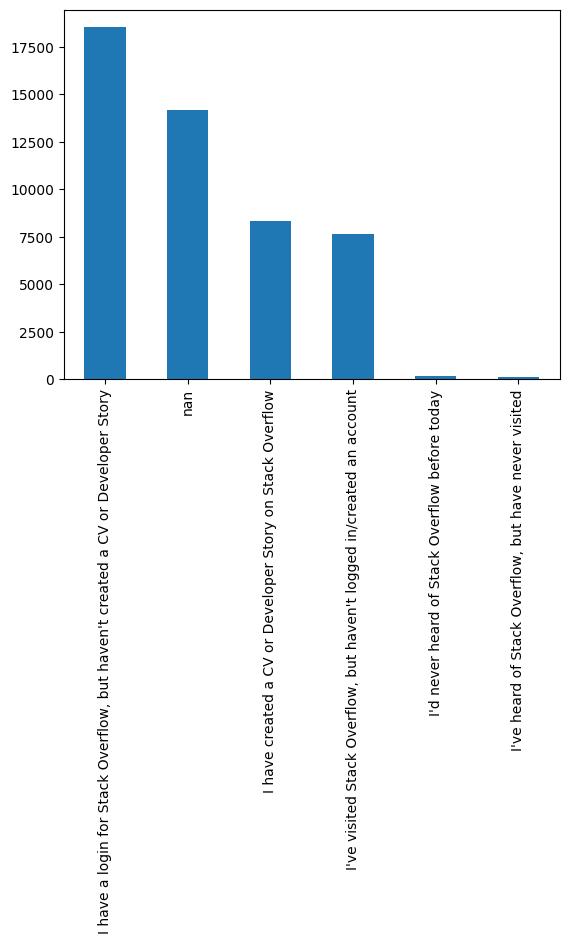

In [ ]:
# Plot a bar chart showing the value counts of 'StackOverflowDescribes' column in df1
df1['StackOverflowDescribes'].value_counts(dropna=False).plot(kind='bar')

In [ ]:
# List of columns related to user activity on Stack Overflow
columns_activity = ['StackOverflowFoundAnswer', 'StackOverflowCopiedCode',
                    'StackOverflowJobListing', 'StackOverflowCompanyPage',
                    'StackOverflowJobSearch', 'StackOverflowNewQuestion',
                    'StackOverflowAnswer', 'StackOverflowMetaChat']

# Dictionary to store unique data types for each activity column
data_type = {}

# Retrieve unique data types for each activity column in df1
for col in columns_activity:
    data_type[col] = df1[col].unique()

data_type

{'StackOverflowFoundAnswer': array(['At least once each week', 'Several times', 'Once or twice', nan,
        'At least once each day', "Haven't done at all"], dtype=object),
 'StackOverflowCopiedCode': array(["Haven't done at all", 'Several times', nan, 'Once or twice',
        'At least once each week', 'At least once each day'], dtype=object),
 'StackOverflowJobListing': array(['Once or twice', "Haven't done at all", 'At least once each week',
        nan, 'Several times', 'At least once each day'], dtype=object),
 'StackOverflowCompanyPage': array(["Haven't done at all", 'Once or twice', 'Several times', nan,
        'At least once each week', 'At least once each day'], dtype=object),
 'StackOverflowJobSearch': array(["Haven't done at all", 'Once or twice', 'At least once each week',
        nan, 'Several times', 'At least once each day'], dtype=object),
 'StackOverflowNewQuestion': array(['Several times', "Haven't done at all", nan, 'Once or twice',
        'At least once each wee

 To facilitate analysis, a preprocessing step is essential: introducing a **numeric scale ranging from 0 to 4** to delineate different activity levels. These numeric representations will reflect varying frequencies of engagement, with higher values indicating more active involvement. Additionally, the missing data will be replaced uniformly with the value 0. This chosen approach aims to account for respondents who possibly abstained from answering due to non-utilization of StackOverflow while ensuring a balanced representation of activity levels during subsequent analysis.

In [ ]:
replacement_dict = {
    "Haven't done at all": 0,
    "Once or twice": 1,
    "Several times": 2,
    "At least once each week": 3,
    "At least once each day": 4
}

activity_df = df1[columns_activity].copy()
for col in columns_activity:
    activity_df[col].replace(replacement_dict, inplace=True)
activity_df.fillna(0, axis=0, inplace=True)
activity_df[columns_activity].head()


,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat
0,3.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0
1,2.0,2.0,1.0,1.0,1.0,0.0,2.0,3.0
2,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
3,3.0,2.0,3.0,2.0,3.0,2.0,4.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. Analyze and Visualize


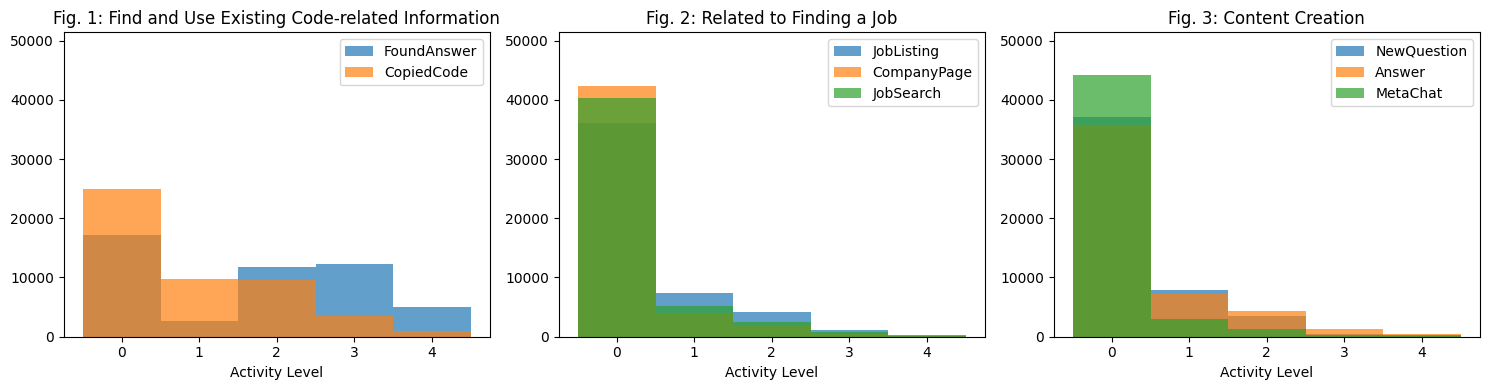

In [ ]:
plt.figure(figsize=(15, 4))

plt.subplot(131)
plt.hist(activity_df[columns_activity[0]], bins=5, range=[-0.5, 4.5], alpha=0.7)
plt.hist(activity_df[columns_activity[1]], bins=5, range=[-0.5, 4.5], alpha=0.7)
plt.ylim([0, 51392])
plt.xlabel('Activity Level')
plt.title('Fig. 1: Find and Use Existing Code-related Information')
plt.legend(['FoundAnswer', 'CopiedCode'])

plt.subplot(132)
plt.hist(activity_df[columns_activity[2]], bins=5, range=[-0.5, 4.5], alpha=0.7)
plt.hist(activity_df[columns_activity[3]], bins=5, range=[-0.5, 4.5], alpha=0.7)
plt.hist(activity_df[columns_activity[4]], bins=5, range=[-0.5, 4.5], alpha=0.7)
plt.ylim([0, 51392])
plt.xlabel('Activity Level')
plt.title('Fig. 2: Related to Finding a Job')
plt.legend(['JobListing', 'CompanyPage', 'JobSearch'])

plt.subplot(133)
plt.hist(activity_df[columns_activity[5]], bins=5, range=[-0.5, 4.5], alpha=0.7)
plt.hist(activity_df[columns_activity[6]], bins=5, range=[-0.5, 4.5], alpha=0.7)
plt.hist(activity_df[columns_activity[7]], bins=5, range=[-0.5, 4.5], alpha=0.7)
plt.ylim([0, 51392])
plt.xlabel('Activity Level')
plt.title('Fig. 3: Content Creation')
plt.legend(['NewQuestion', 'Answer', 'MetaChat'])

plt.tight_layout()
plt.show()


#### Findings

Figure 1 highlights that about 34% of respondents didn't find an answer, while 50% didn't copy code from StackOverflow within the last 3 months. Figures 2 and 3 reveal that a considerable majority (roughly 80%) were inactive in terms of job search activities and content creation on StackOverflow during the same period. This observation suggests that code-related assistance on StackOverflow garners higher user engagement compared to other activities. It indicates a higher proportion of users with medium activity levels than those with low activity, implying that many have developed a habit of seeking answers on StackOverflow. Additionally, this underscores the website's effectiveness in providing quality code-related information.

## Question2: Exploring potential correlations between a developer's salary and their activity on the platform.

#### 1. Gather necessary data



In [ ]:
# Adding the Salary column in df1 to activity_df
activity_df['Salary'] = df1['Salary']
activity_df.head()

,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,Salary
0,3.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,NaN
1,2.0,2.0,1.0,1.0,1.0,0.0,2.0,3.0,NaN
2,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,113750.0
3,3.0,2.0,3.0,2.0,3.0,2.0,4.0,4.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


<Axes: >

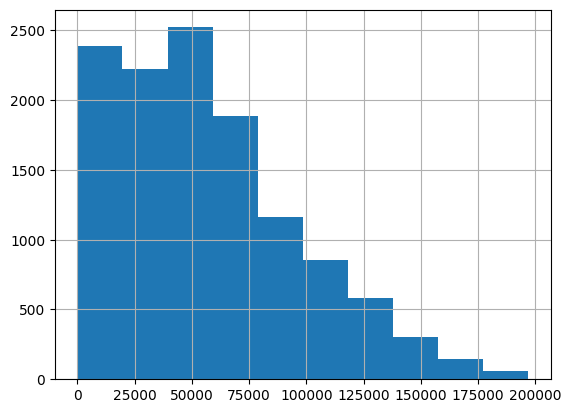

In [ ]:
activity_df['Salary'].hist()

#### 2. Handle missing data

In [ ]:
missing_salary_proportion = activity_df['Salary'].isnull().mean()
rows_without_missing_salary = activity_df['Salary'].notnull().sum()

print(f"Proportion of missing values in 'Salary' column: {missing_salary_proportion:.4f}")
print(f"Number of rows without missing 'Salary' data: {rows_without_missing_salary}")

Proportion of missing values in 'Salary' column: 0.7525
Number of rows without missing 'Salary' data: 12118


In [ ]:
activity_dropna = activity_df.dropna(subset=['Salary'])
activity_dropna.describe()

,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,Salary
count,12118.000000,12118.000000,12118.000000,12118.000000,12118.000000,12118.000000,12118.000000,12118.000000,12118.000000
mean,2.331738,1.170325,0.618419,0.303680,0.410876,0.427958,0.599026,0.188728,56342.060401
std,1.153929,1.069525,0.889708,0.673265,0.771450,0.704775,0.892999,0.562902,39878.198823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26875.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50000.000000
75%,3.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,80000.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,197000.000000


#### 3. Analyze and Visualize

<Axes: >

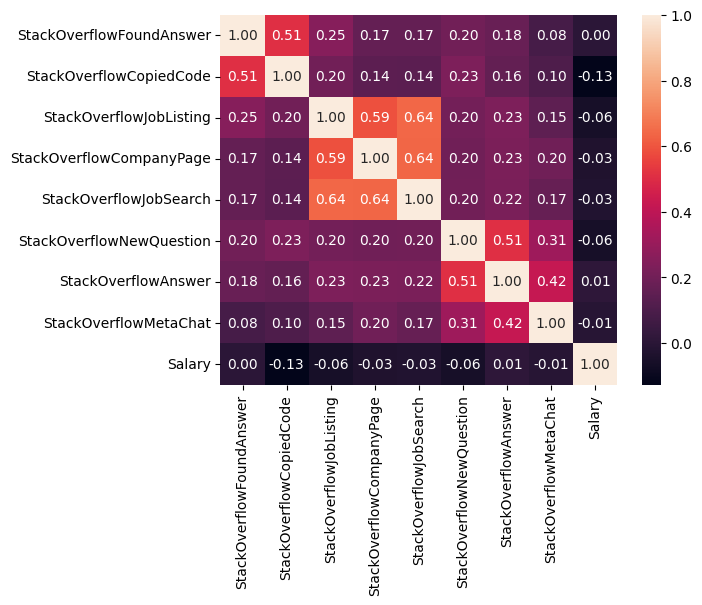

In [ ]:
sns.heatmap(activity_dropna.corr(), annot=True, fmt=".2f")

#### Findings

The correlation coefficients between salary and activity levels were relatively small, ranging between -0.13 and 0.01.


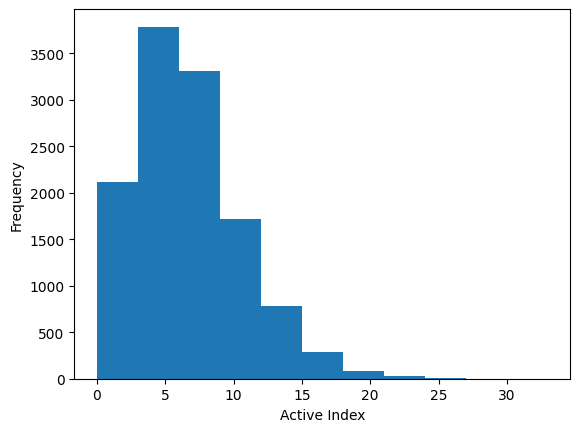

In [ ]:
activity_dropna2 = activity_dropna.copy()
activity_dropna2['Active index'] = activity_dropna[columns_activity].sum(axis=1)

plt.hist(activity_dropna2['Active index'], bins=11, range=(0, 33))
plt.xlabel('Active Index')
plt.ylabel('Frequency')
plt.show()

A scatter plot of the activity index and salary. It can be seen from the figure that they do not show a clear linear relationship.

Text(0, 0.5, 'Active Index')

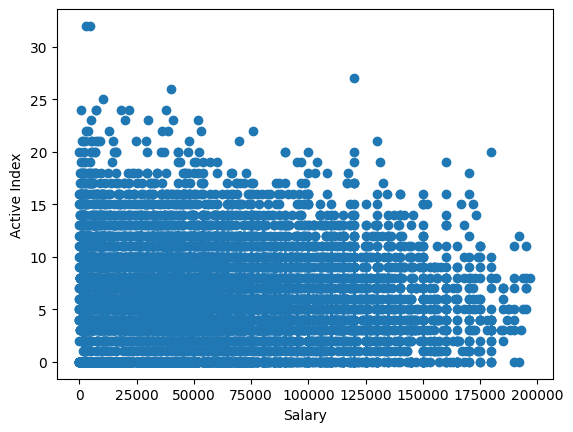

In [ ]:
plt.scatter(activity_dropna2['Salary'], activity_dropna2['Active index'])
plt.xlabel('Salary')
plt.ylabel('Active Index')

## Question3: Investigating whether the status of a user account influences user behavior and its potential for additional utilization.


In [ ]:
activity_df2 = activity_df.copy()
activity_df2['Describes'] = df1['StackOverflowDescribes']
activity_df2.drop('Salary', axis=1, inplace=True)
activity_df2.head()

,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,Describes
0,3.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,I have created a CV or Developer Story on Stac...
1,2.0,2.0,1.0,1.0,1.0,0.0,2.0,3.0,I have created a CV or Developer Story on Stac...
2,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,I have created a CV or Developer Story on Stac...
3,3.0,2.0,3.0,2.0,3.0,2.0,4.0,4.0,I have created a CV or Developer Story on Stac...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


#### 3.2. Handle missing data

In [ ]:
missing_describes_proportion = activity_df2['Describes'].isnull().mean()
rows_without_missing_describes = activity_df2['Describes'].notnull().sum()

print(f"Proportion of missing values in 'Describes' column: {missing_describes_proportion:.4f}")
print(f"Number of rows without missing 'Describes' data: {rows_without_missing_describes}")

Proportion of missing values in 'Describes' column: 0.2890
Number of rows without missing 'Describes' data: 34815


In [ ]:
activity_df2.dropna(inplace=True)

In [ ]:
Describes_list = activity_df2['Describes'].unique()

In [ ]:
activity_avg = []
for des in Describes_list:
    list1 = []
    for col in columns_activity:
        list1.append(activity_df2[activity_df2['Describes'] == des][col].mean())
    activity_avg.append(list1)

#### 3.3. Analyze and Visualize


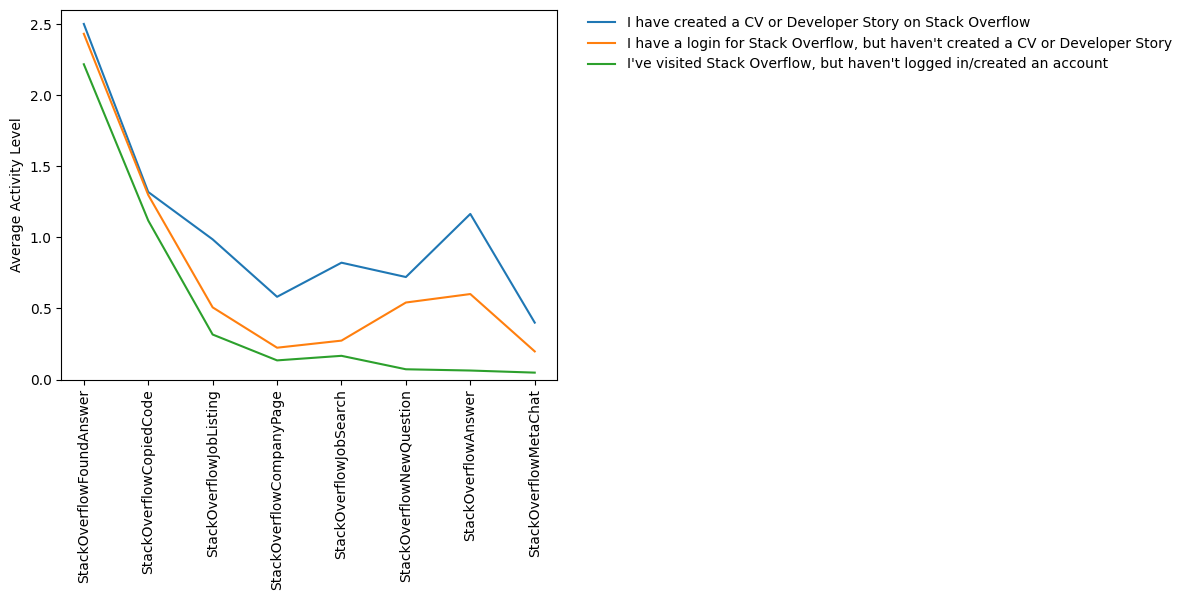

In [ ]:
for i in range(len(activity_avg[0:3])):
    plt.plot(list(range(len(columns_activity))), activity_avg[i], label=Describes_list[i])

plt.legend(frameon=False, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.xticks(list(range(len(columns_activity))), columns_activity, rotation=90)
plt.ylabel('Average Activity Level')
plt.ylim([0, 2.6])
plt.show()


#### 3.4. Findings

The depicted figure reveals a noteworthy trend where, irrespective of account registration status, the frequency of finding answers and copying codes on the website appears relatively consistent. Moving to the second observation, the second and third user classifications demonstrate limited activity in job-related behavior, in stark contrast to the notably higher activity observed among the first user group. Regarding content creation, the third classification of users displays notably lower participation frequency, whereas the second classification emerges as more active. The first user group stands out as the most actively engaged. Moreover, the second observation hints at a potential link—suggesting that users creating a CV or developer story might exhibit a higher inclination towards job search activities on Stack Overflow. This insight opens avenues for targeted ad serving, presenting users with job ads aligning with their profiles.